In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os



In [2]:
# Paths for testing dataset and model
test_data = os.path.join(os.getcwd(), 'data', 'test')

# Load the trained model
model = load_model('model_file.h5')

# Load class labels
class_labels = ['Angry', 'Disgust', 'Fear','Happy', 'Neutral','Sad','Suprise']

# Preprocess the testing data
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_data,
    color_mode='grayscale',
    target_size=(40, 40),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Ensure predictions align with true labels
)



Found 7178 images belonging to 7 classes.


225/225 [==============================] - 87s 362ms/step
Classification Report:
              precision    recall  f1-score   support

       Angry       0.48      0.52      0.50       958
     Disgust       0.68      0.43      0.53       111
        Fear       0.50      0.27      0.35      1024
       Happy       0.78      0.86      0.82      1774
     Neutral       0.53      0.57      0.55      1233
         Sad       0.47      0.49      0.48      1247
     Suprise       0.70      0.77      0.73       831

    accuracy                           0.60      7178
   macro avg       0.59      0.56      0.57      7178
weighted avg       0.59      0.60      0.59      7178



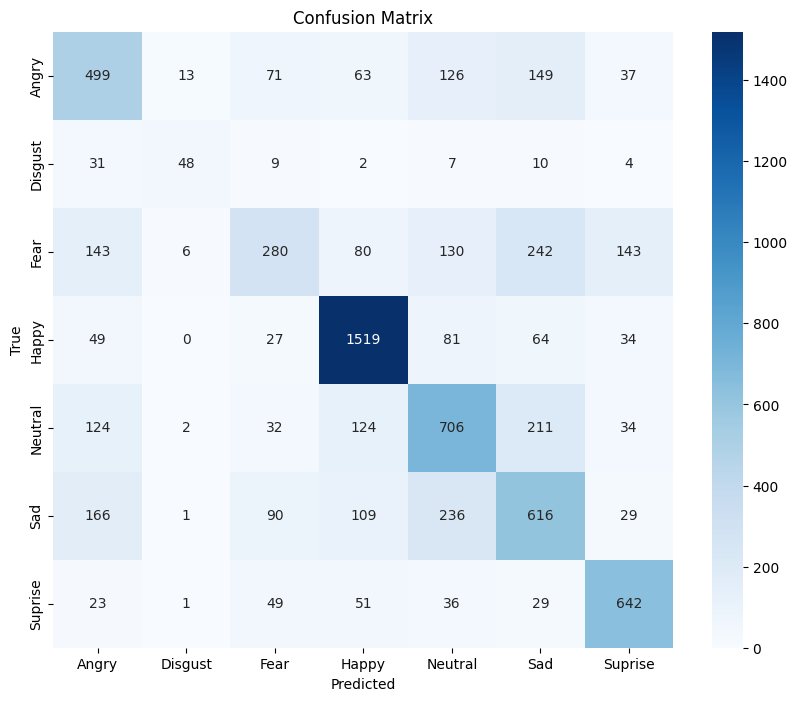

Visualizing Randomly Selected Images:


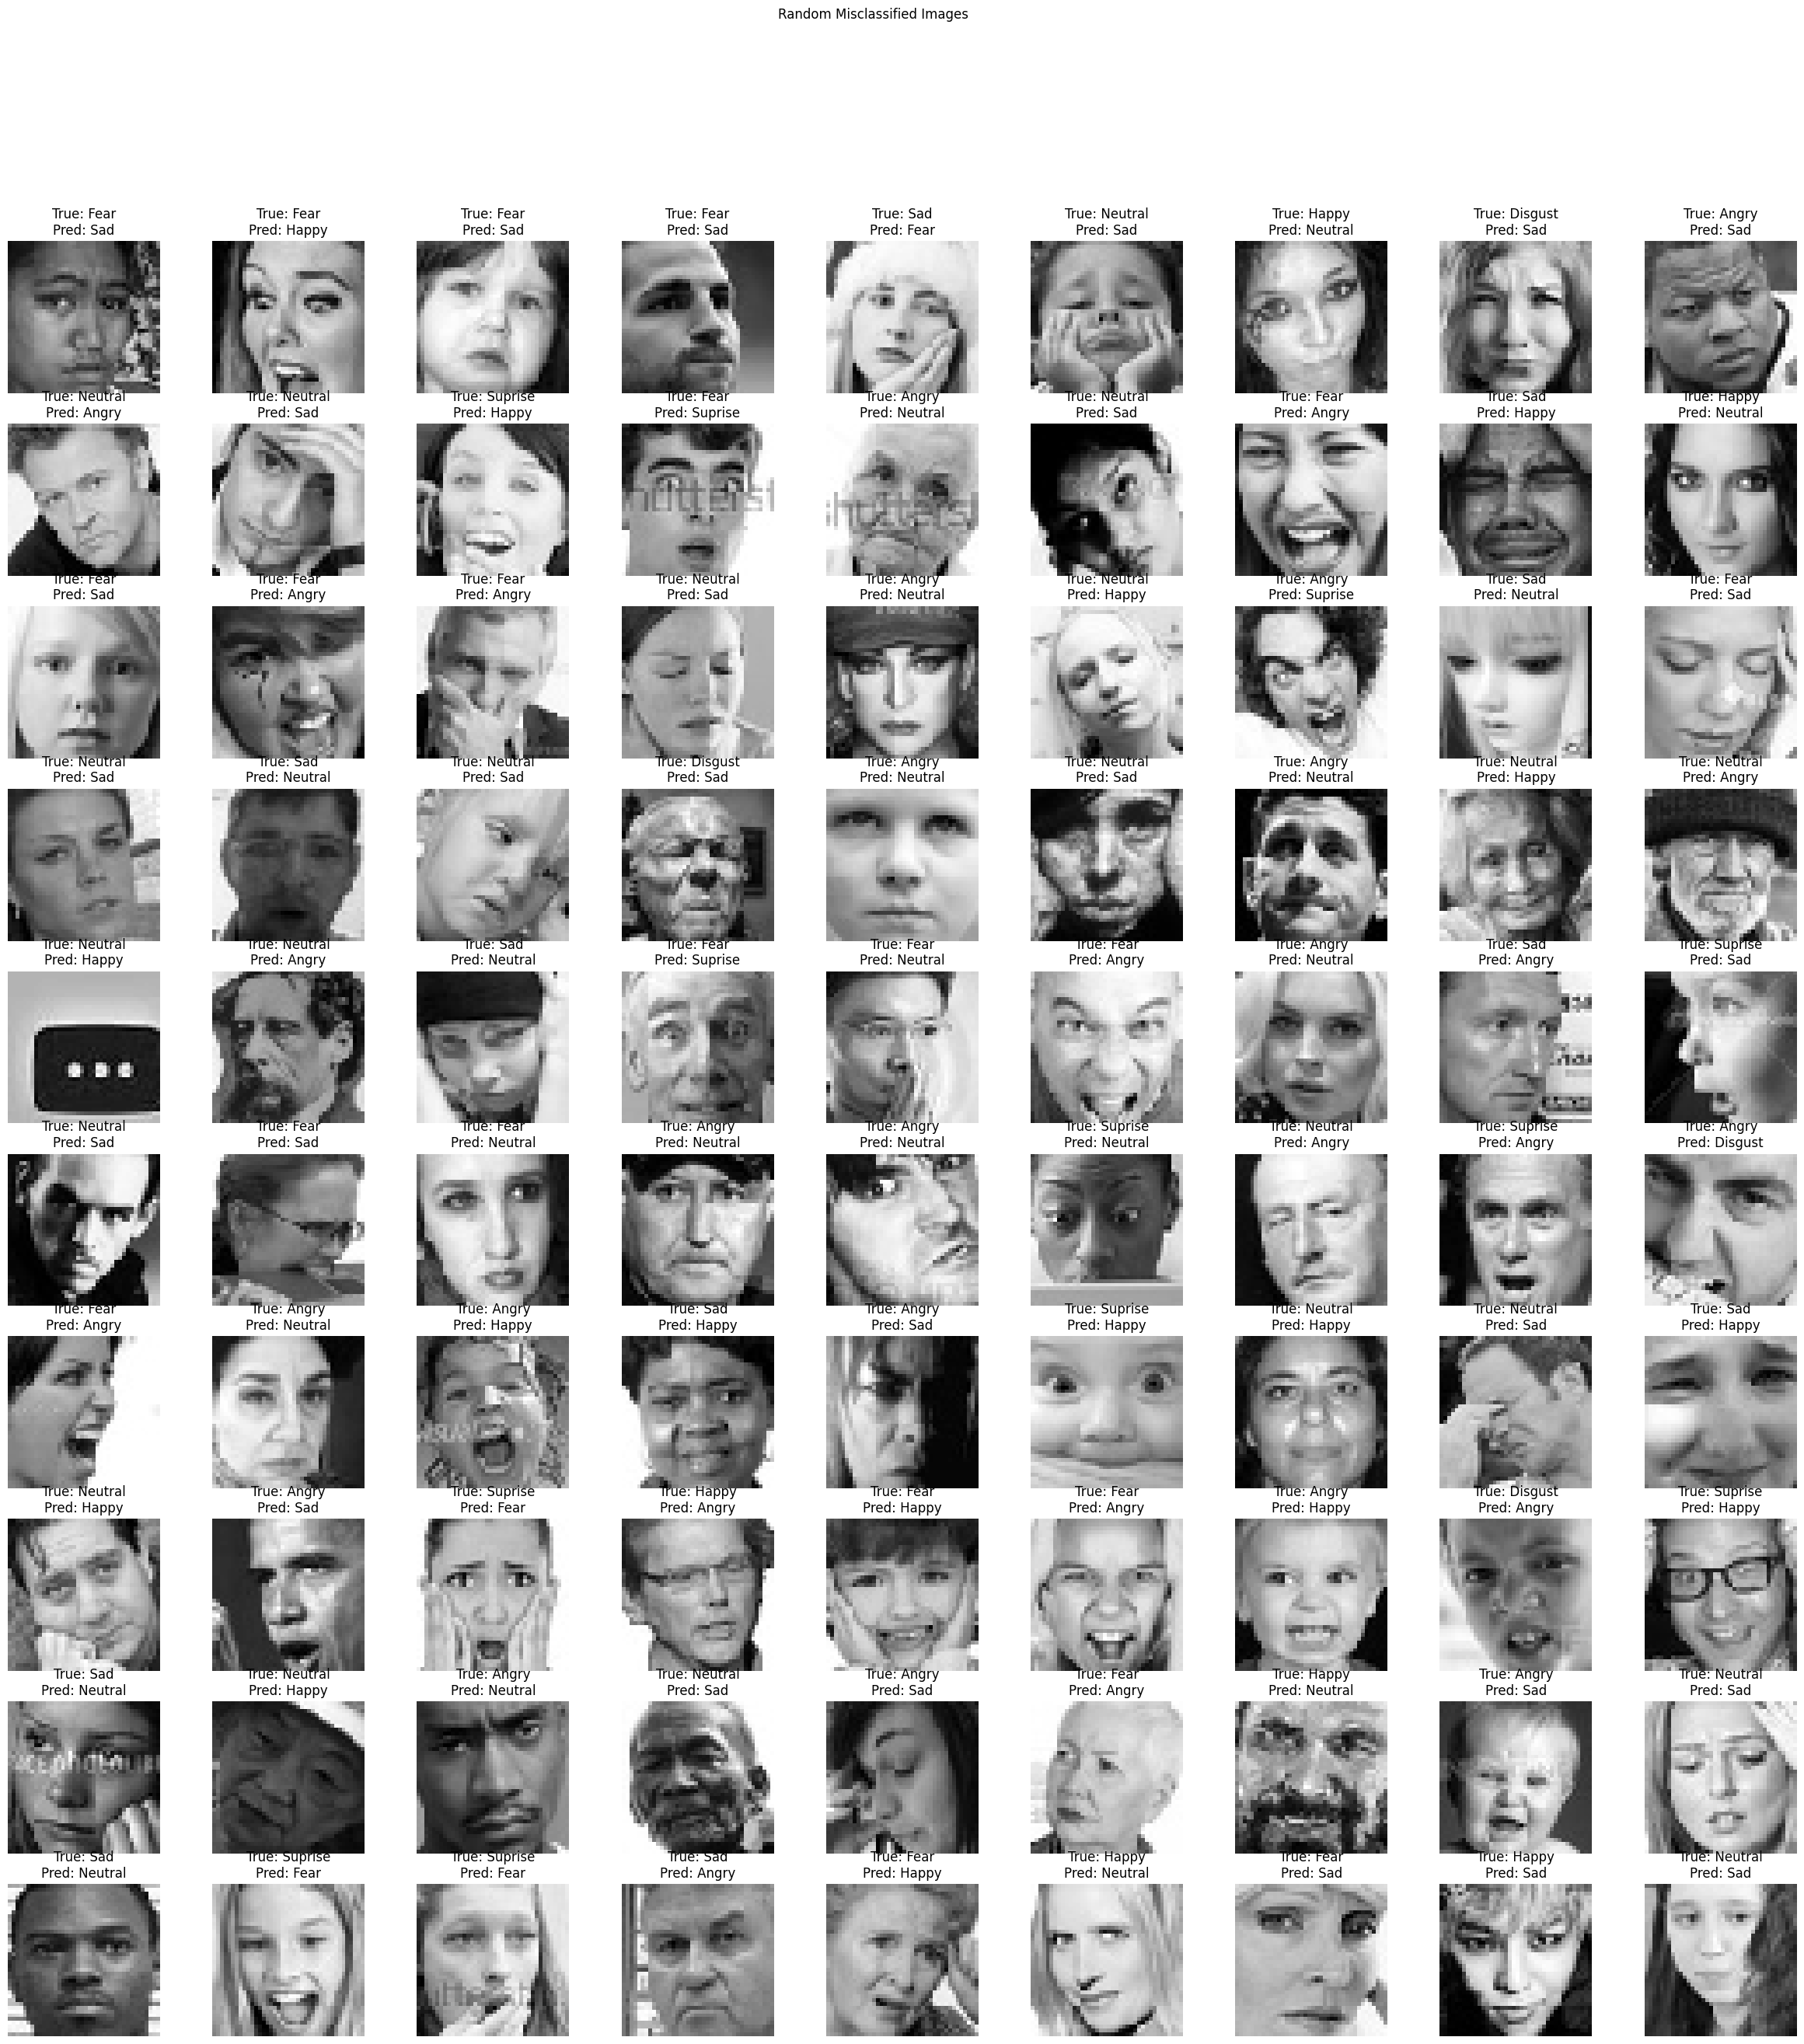

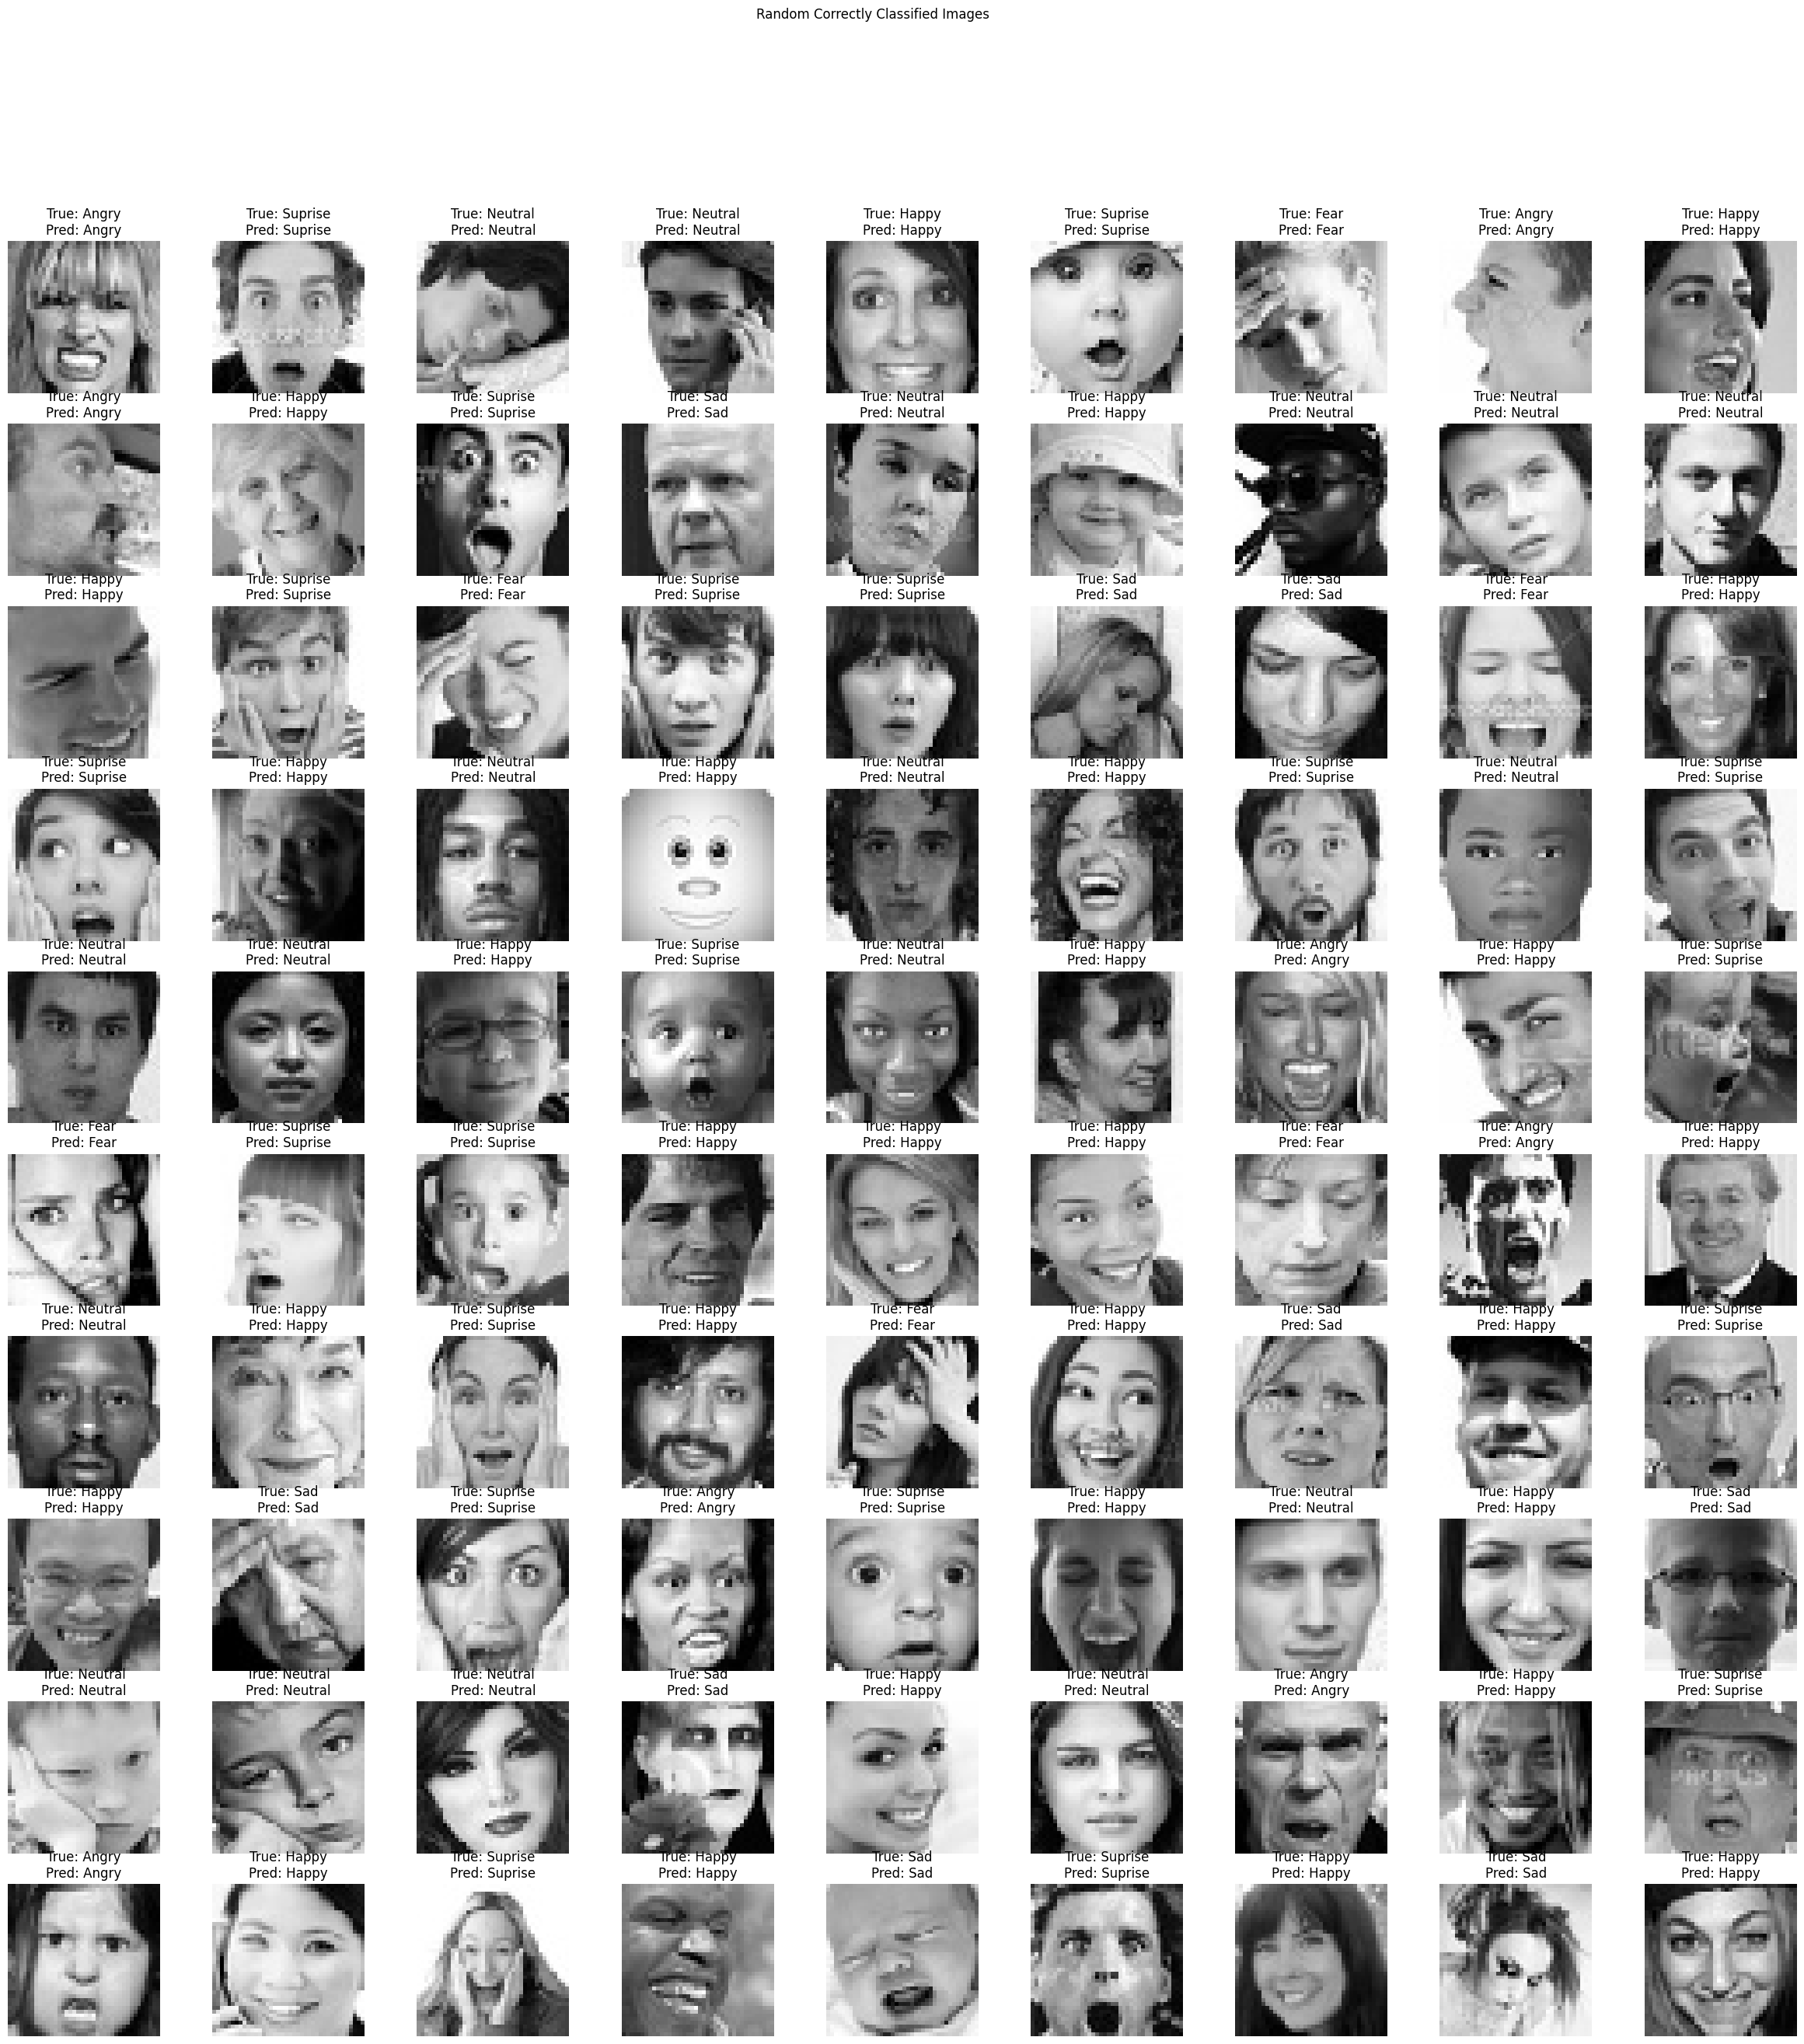

In [3]:
# Predict on the test data
val_preds = model.predict(validation_generator)
val_preds_classes = np.argmax(val_preds, axis=1)  # Predicted classes
true_classes = validation_generator.classes        # True classes

# Classification report
print("Classification Report:")
print(classification_report(true_classes, val_preds_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, val_preds_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

def plot_random_images_by_classification(generator, predictions, true_classes, class_labels, num_images=90, title='Images'):
    """
    Plots random images that are correctly or incorrectly classified with their true and predicted labels.

    Args:
        generator: The data generator used to retrieve images.
        predictions: Predicted classes for all images.
        true_classes: True classes for all images.
        class_labels: List of class label names.
        num_images: Number of random images to display.
        title: Title for the plot.
    """
    # Retrieve all data from the generator
    all_images, all_labels = generator[0]
    for batch_idx in range(1, len(generator)):
        batch_images, batch_labels = generator[batch_idx]
        all_images = np.concatenate((all_images, batch_images))
        all_labels = np.concatenate((all_labels, batch_labels))

    # Identify misclassified and correctly classified indices
    misclassified_indices = np.where(predictions != true_classes)[0]
    correctly_classified_indices = np.where(predictions == true_classes)[0]

    # Randomly sample 50 from each category
    selected_misclassified = np.random.choice(misclassified_indices, size=min(num_images, len(misclassified_indices)), replace=False)
    selected_correctly_classified = np.random.choice(correctly_classified_indices, size=min(num_images, len(correctly_classified_indices)), replace=False)

    # Function to plot images
    def plot_images(indices, title):
        plt.figure(figsize=(30, 30))
        for i, idx in enumerate(indices):
            img = all_images[idx]
            true_label = class_labels[true_classes[idx]]
            pred_label = class_labels[predictions[idx]]

            plt.subplot(10, 9, i + 1)  # Adjust grid for 50 images (10 rows x 5 columns)
            plt.imshow(img.reshape(40, 40), cmap='gray')  # Update dimensions based on your image shape
            plt.title(f'True: {true_label}\nPred: {pred_label}')
            plt.axis('off')

        plt.suptitle(title)
        plt.show()

    # Plot 90 random misclassified images
    plot_images(selected_misclassified, title='Random Misclassified Images')

    # Plot 90 random correctly classified images
    plot_images(selected_correctly_classified, title='Random Correctly Classified Images')

print("Visualizing Randomly Selected Images:")
plot_random_images_by_classification(
    generator=validation_generator, 
    predictions=val_preds_classes, 
    true_classes=true_classes, 
    class_labels=class_labels, 
    num_images=90
)
